In [ ]:
from tensorflow import keras as tfk
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import keras
from sklearn.metrics import classification_report

In [ ]:
cifar10 = tfk.datasets.cifar10
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

In [ ]:
print(x_train.shape, y_train.shape , x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# x_train = x_train.reshape(len(x_train), 3, 32, 32).transpose(0, 2, 3, 1)
# x_test = x_test.reshape(len(x_test), 3, 32, 32).transpose(0, 2, 3, 1)
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.transpose(0, 3, 1, 2)
x_test = x_test.transpose(0, 3, 1, 2)

In [ ]:
# Normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
# One hot encode labels using to_categorical
y_train = tfk.utils.to_categorical(y_train, 10)
y_test = tfk.utils.to_categorical(y_test, 10)

In [ ]:
model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='tanh'),
    tfk.layers.Dense(1024, activation='tanh'),
    tfk.layers.Dense(10, activation='softmax')
])
model.summary()
tfk.utils.plot_model(model, show_shapes=True)
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

log = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)




Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_26 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_27 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_28 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_29 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_30 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_31 (Dense)            (None, 10)               

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 6s 4ms/step - loss: 1.8476 - accuracy: 0.3377 - val_loss: 1.7004 - val_accuracy: 0.3983
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6493 - accuracy: 0.4144 - val_loss: 1.7216 - val_accuracy: 0.3747
Epoch 3/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5585 - accuracy: 0.4442 - val_loss: 1.5343 - val_accuracy: 0.4595
Epoch 4/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.4943 - accuracy: 0.4688 - val_loss: 1.6114 - val_accuracy: 0.4323
Epoch 5/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.4434 - accuracy: 0.4850 - val_loss: 1.5047 - val_accuracy: 0.4686
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3948 - accuracy: 0.5037 - val_loss: 1.4837 - val_accuracy: 0.4802
Epoch 7/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.3573 - accuracy: 0.5193 - val_loss: 1.4390 - val_accuracy: 0.4939
Epo

In [ ]:
from sklearn.metrics import classification_report
# classification report for train data for epochs
y_predTrain = model.predict(x_train)
y_predTrain = np.argmax(y_predTrain, axis=1)
y_train = np.argmax(y_train, axis=1)
print(classification_report(y_train, y_predTrain))

y_predTest = model.predict(x_test)
y_predTest = np.argmax(y_predTest, axis=1)
y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, y_predTest))

1563/1563 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      5000
           1       0.89      0.35      0.51      5000
           2       0.40      0.54      0.46      5000
           3       0.47      0.36      0.41      5000
           4       0.58      0.36      0.45      5000
           5       0.51      0.45      0.48      5000
           6       0.62      0.61      0.61      5000
           7       0.49      0.78      0.60      5000
           8       0.51      0.81      0.62      5000
           9       0.66      0.55      0.60      5000

    accuracy                           0.54     50000
   macro avg       0.57      0.54      0.53     50000
weighted avg       0.57      0.54      0.53     50000

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1000
           1       0

In [ ]:
def showPlot(log):
  plt.figure(figsize=(15, 5))
  plt.subplot(1, 2, 1)
  plt.plot(log.history['accuracy'], label='Train Accuracy')
  plt.plot(log.history['val_accuracy'], label='Test Loss')
  plt.title('Model accuracy of Train data')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend()

  # plot loss during training
  plt.subplot(1, 2, 2)
  plt.plot(log.history['loss'], label='Train Loss')
  plt.plot(log.history['val_loss'], label='Test Loss')
  plt.title('Model loss of Train data')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()


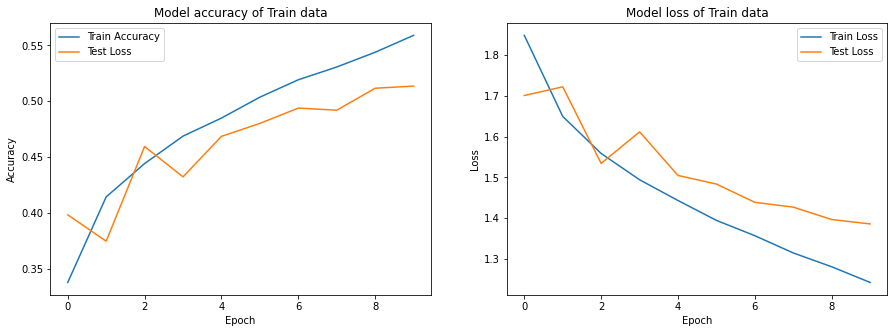

In [ ]:
showPlot(log)

#The Effect of Hyperparameters

##The Effect of Optimizer

What is Momentum and why do we use it? </br>
Momentum in neural networks is a variant of the stochastic gradient descent.Momentum is an additional hyperparameter that controls the amount of history in the update equation. momentum is known to speed up learning and to help not getting stuck in local minima because it results in converging faster.

In [ ]:
momentums = [0.5 , 0.9, 0.98]
trainAccuracy = []
trainLoss = []
testAccuracy = []
testLoss = []
for momentum in momentums:
  model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(10, activation='softmax')
  ])
  tfk.utils.plot_model(model, show_shapes=False)
  optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=momentum)
  model.compile(
    optimizer=optimizer,
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
  )

  log = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)     
  trainAccuracy.append(log.history['accuracy'])
  trainLoss.append(log.history['loss'])
  testAccuracy.append(log.history['val_accuracy'])
  testLoss.append(log.history['val_loss'])




Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3017 - accuracy: 0.1074 - val_loss: 2.3005 - val_accuracy: 0.1014
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3002 - accuracy: 0.1146 - val_loss: 2.2998 - val_accuracy: 0.1242
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2981 - accuracy: 0.1257 - val_loss: 2.2961 - val_accuracy: 0.1471
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2927 - accuracy: 0.1385 - val_loss: 2.2867 - val_accuracy: 0.1739
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2722 - accuracy: 0.1559 - val_loss: 2.2449 - val_accuracy: 0.1591
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2054 - accuracy: 0.1634 - val_loss: 2.1634 - val_accuracy: 0.1772
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1544 - accuracy: 0.1735 - val_loss: 2.2025 - val_accuracy:

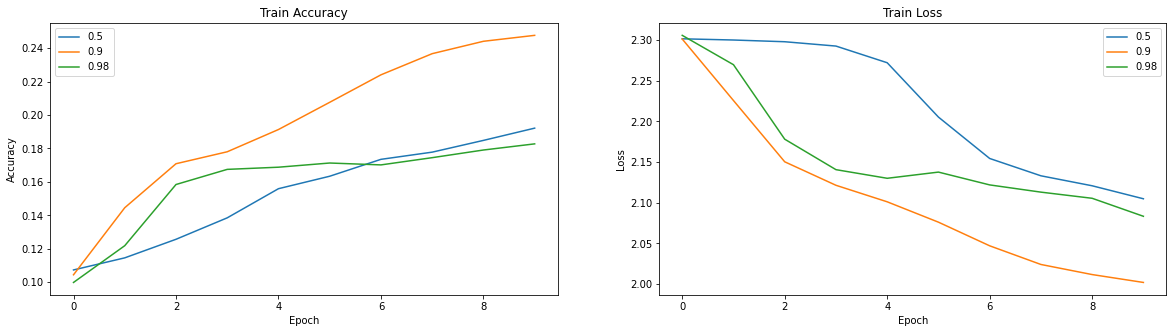

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(trainAccuracy[0], label='0.5')
plt.plot(trainAccuracy[1], label='0.9')
plt.plot(trainAccuracy[2], label='0.98')
plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(trainLoss[0], label='0.5')
plt.plot(trainLoss[1], label='0.9')
plt.plot(trainLoss[2], label='0.98')
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

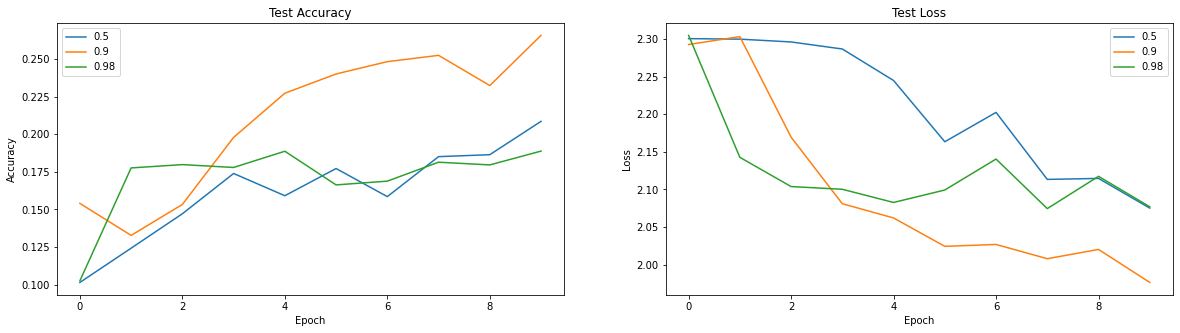

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(testAccuracy[0], label='0.5')
plt.plot(testAccuracy[1], label='0.9')
plt.plot(testAccuracy[2], label='0.98')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(testLoss[0], label='0.5')
plt.plot(testLoss[1], label='0.9')
plt.plot(testLoss[2], label='0.98')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Using too large momentum resultss in not converging and Using too small momentum makes the speed of learning very low.

###Using Adam Optimiser

In [ ]:
model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(10, activation='softmax')
])
model.summary()
tfk.utils.plot_model(model, show_shapes=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

log = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)


Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_41 (Flatten)        (None, 3072)              0         
                                                                 
 dense_238 (Dense)           (None, 1024)              3146752   
                                                                 
 dense_239 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_240 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_241 (Dense)           (None, 10)                10250     
                                                                 
Total params: 5,256,202
Trainable params: 5,256,202
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [=====================

In [ ]:
y_predTrain = model.predict(x_train)
y_predTrain = np.argmax(y_predTrain, axis=1)
y_train = np.argmax(y_train, axis=1)
print(classification_report(y_train, y_predTrain))

y_predTest = model.predict(x_test)
y_predTest = np.argmax(y_predTest, axis=1)
y_test = np.argmax(y_test, axis=1)
print(classification_report(y_test, y_predTest))

1563/1563 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.64      0.46      0.54      5000
           1       0.60      0.74      0.66      5000
           2       0.51      0.23      0.32      5000
           3       0.38      0.41      0.39      5000
           4       0.39      0.53      0.45      5000
           5       0.54      0.31      0.39      5000
           6       0.43      0.71      0.53      5000
           7       0.66      0.54      0.59      5000
           8       0.53      0.80      0.64      5000
           9       0.70      0.44      0.54      5000

    accuracy                           0.52     50000
   macro avg       0.54      0.52      0.51     50000
weighted avg       0.54      0.52      0.51     50000

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.61      0.45      0.51      1000
           1       0

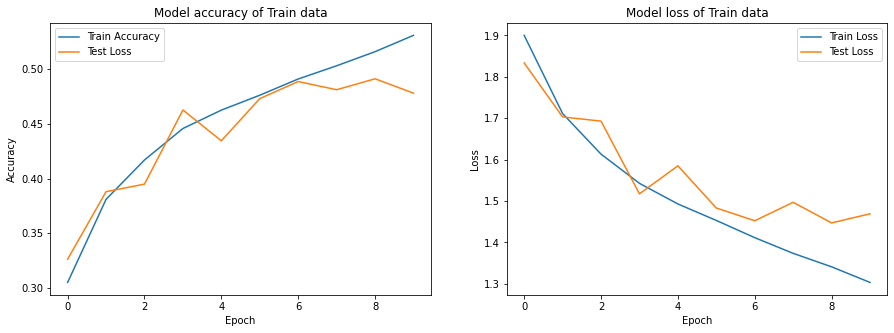

In [ ]:
showPlot(log)

On image classification problems, Adam generalization performance is significantly worse than SGD. However, Adam which is an adaptive optimization method may converge faster.


##The Effect of Numbers of Epochs

We do not need to train the model for many epochs on all the models. The model should be trained for an optimal number of epochs to avoid overfitting and also increase the generalization capacity of neural network. Loss and accuracy are availabe to look over the epoch number after which the model starts overfitting.
If the number of epochs is few, underfitting happens. On the other hand; if the number of epochs is very large, overfitting happens. To avoid overfitting we can use: </br>
Early Stopping (Monitor model performance on validation data and stop training when performance decreases), Change network complexity (change valu of number of weights), etc.

##The Effect of Loss Function

In [ ]:
model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    tfk.layers.Dense(10, activation='softmax')
])
model.summary()
tfk.utils.plot_model(model, show_shapes=True)
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['accuracy']
)

log = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_32 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_33 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_34 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_35 (Dense)            (None, 10)                10250     
                                                                 
Total params: 5,256,202
Trainable params: 5,256,202
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [======================

In [ ]:
y_predTrain = model.predict(x_train)
y_predTrain = np.argmax(y_predTrain, axis=1)
print(classification_report(np.argmax(y_train, axis=1), y_predTrain))

y_predTest = model.predict(x_test)
y_predTest = np.argmax(y_predTest, axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_predTest))

1563/1563 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.40      0.48      0.44      5000
           1       0.40      0.43      0.42      5000
           2       0.30      0.20      0.24      5000
           3       0.31      0.14      0.19      5000
           4       0.36      0.28      0.31      5000
           5       0.31      0.39      0.35      5000
           6       0.35      0.45      0.40      5000
           7       0.40      0.37      0.38      5000
           8       0.45      0.55      0.49      5000
           9       0.42      0.49      0.45      5000

    accuracy                           0.38     50000
   macro avg       0.37      0.38      0.37     50000
weighted avg       0.37      0.38      0.37     50000

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.42      0.50      0.46      1000
           1       0

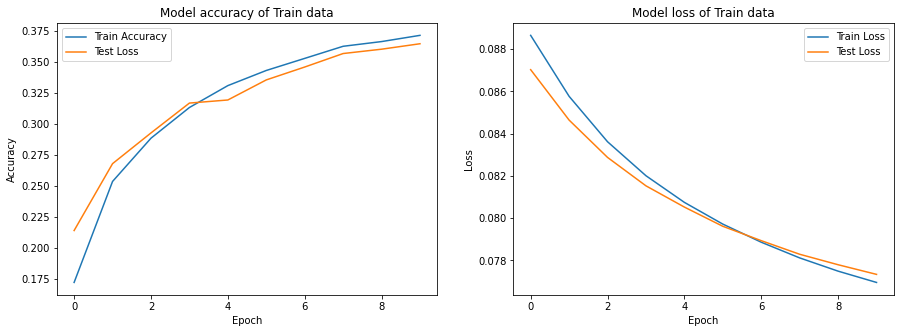

In [ ]:
showPlot(log)

as we can see MSE is not agood choice for binary classification problems. Using MSE, we assume that the data has a normal distribution but binary classification has a bernoulli distribution. Also using MSE foe trainning binary classification does not guarantee to minimize the cost function.

##The Effect of Regularization

In [ ]:
model = tfk.models.Sequential([
    tfk.layers.Flatten(input_shape=(3, 32, 32)),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    keras.layers.Dropout(0.1),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    keras.layers.Dropout(0.1),
    tfk.layers.Dense(1024, activation='leaky_relu'),
    keras.layers.Dropout(0.1),
    tfk.layers.Dense(10, activation='softmax')
])
model.summary()
tfk.utils.plot_model(model, show_shapes=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

log = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_36 (Dense)            (None, 1024)              3146752   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_37 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_38 (Dense)            (None, 1024)              1049600   
                                                                 
 dropout_2 (Dropout)         (None, 1024)             

/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1250/1250 [==============================] - 6s 4ms/step - loss: 2.0388 - accuracy: 0.2715 - val_loss: 1.8498 - val_accuracy: 0.3361
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8467 - accuracy: 0.3347 - val_loss: 1.8205 - val_accuracy: 0.3432
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7818 - accuracy: 0.3609 - val_loss: 1.6998 - val_accuracy: 0.3914
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7457 - accuracy: 0.3756 - val_loss: 1.7701 - val_accuracy: 0.3741
Epoch 5/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.7135 - accuracy: 0.3893 - val_loss: 1.8169 - val_accuracy: 0.3754
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6944 - accuracy: 0.3982 - val_loss: 1.6143 - val_accuracy: 0.4265
Epoch 7/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.6735 - accuracy: 0.4056 - val_loss: 1.6181 - val_accuracy: 0.4248
Epo

In [ ]:
print("Train Classification Report")
y_predTrain = model.predict(x_train)
y_predTrain = np.argmax(y_predTrain, axis=1)
print(classification_report(np.argmax(y_train, axis=1), y_predTrain))

print("Test Classification Report")
y_predTest = model.predict(x_test)
y_predTest = np.argmax(y_predTest, axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_predTest))

Train Classification Report
1563/1563 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       0.56      0.42      0.48      5000
           1       0.45      0.76      0.56      5000
           2       0.59      0.10      0.16      5000
           3       0.33      0.46      0.38      5000
           4       0.42      0.45      0.43      5000
           5       0.43      0.26      0.32      5000
           6       0.68      0.34      0.45      5000
           7       0.51      0.62      0.56      5000
           8       0.49      0.76      0.59      5000
           9       0.54      0.54      0.54      5000

    accuracy                           0.47     50000
   macro avg       0.50      0.47      0.45     50000
weighted avg       0.50      0.47      0.45     50000

Test Classification Report
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       

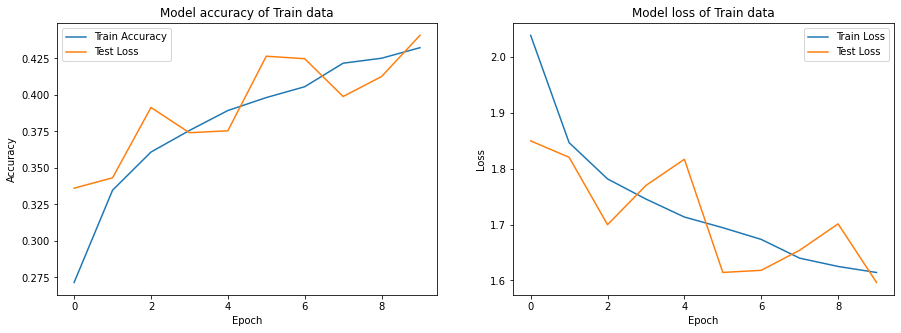

In [ ]:
showPlot(log)

We use regularization to prevent overfitting. One of the Regularization methods is Dropout that approximates training a large number of neural networks with different architectures in parallel. Dropout forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons. 
During training, some number of layer outputs are randomly ignored.